In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('spam.csv', encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(7)

,v1,v2
3732,ham,Old Orchard near univ. How about you?
3111,ham,Just haven't decided where yet eh ?
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
1139,ham,Message:some text missing* Sender:Name Missing...
730,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...
5129,ham,"Rose for red,red for blood,blood for heart,hea..."
4362,ham,Evry Emotion dsn't hav Words.Evry Wish dsn't h...


In [9]:
df.rename(columns={'v1': 'Target', 'v2': 'text'}, inplace=True)

In [10]:
df.head(7)

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Target'] = le.fit_transform(df['Target'])

In [12]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

Target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

2. EDA

<Axes: xlabel='Target', ylabel='count'>

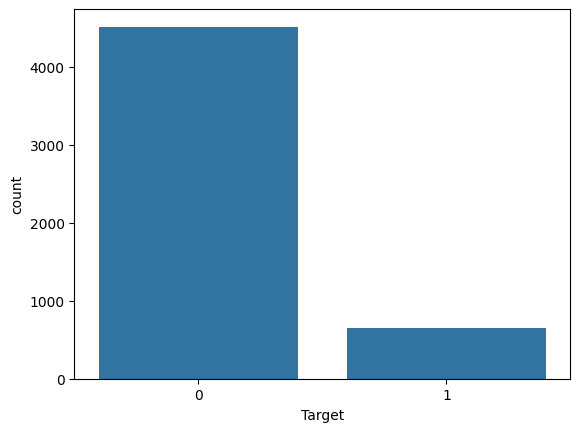

In [18]:
sns.countplot(x = df['Target'])

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

DATA IS IMBALANCED

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) 
df.head()

,Target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam 
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
#ham  
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

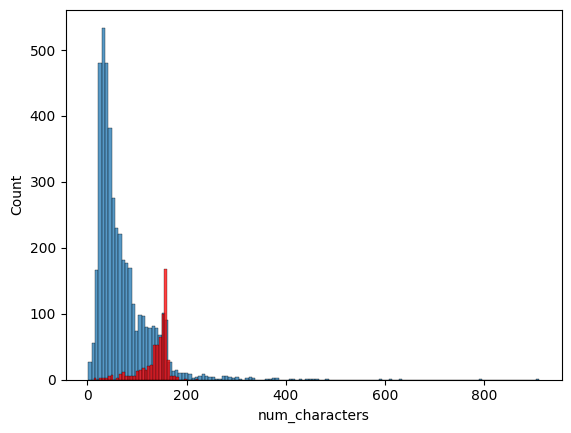

In [28]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

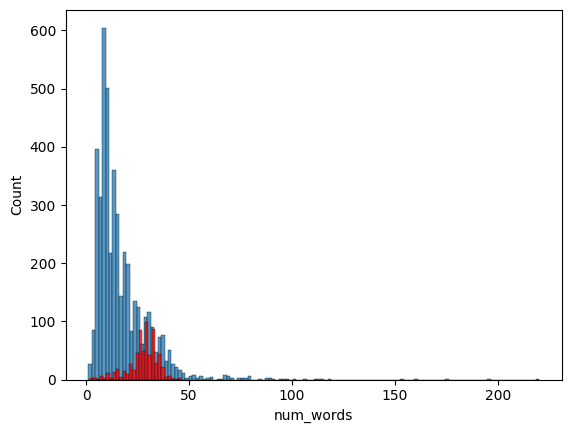

In [29]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

<Axes: >

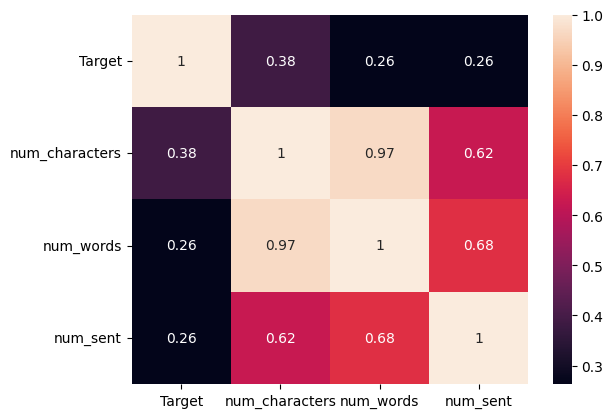

In [30]:
numeric_df = df.drop(columns=['text'])
sns.heatmap(numeric_df.corr(), annot=True)

3. DATA PREPROCESSING / TEXT PREPROCESSING

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [32]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
ps = PorterStemmer()
s = SnowballStemmer('english')
wl = WordNetLemmatizer()

In [33]:
def transform_text(txt):

    y = []
    txt = txt.lower()
    txt = nltk.word_tokenize(txt) 

    for word in txt:
        if word.isalnum() and word not in stop_words:
            y.append(ps.stem(word)) 

    return " ".join(y) 

In [34]:
transform_text('Hi, my name is Adarsh!, How are you ?? , You are a boy right ?? {}, I like coding, you like dancing')

'hi name adarsh boy right like code like danc'

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [37]:
df.head()

,Target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
!pip install wordcloud

In [39]:
from wordcloud import WordCloud

In [40]:
wc = WordCloud(width=700, height=700, min_font_size=10, background_color='white')

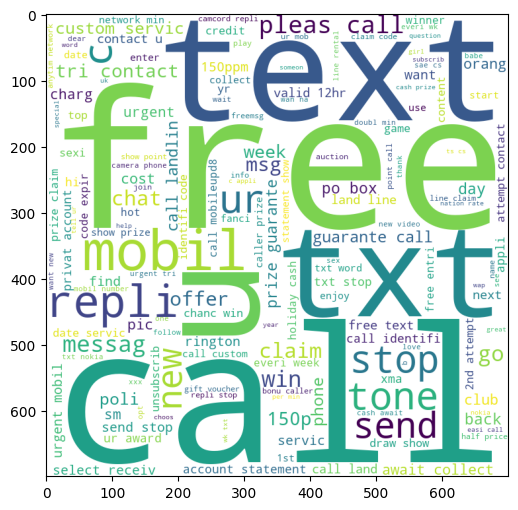

In [41]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

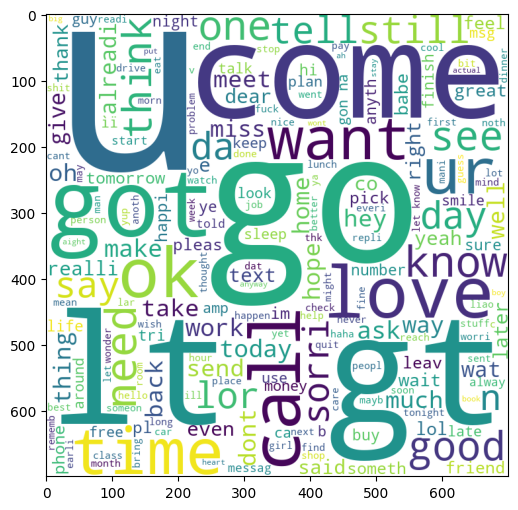

In [42]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [43]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [44]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(35), columns=['word', 'count'])

In [45]:
spam_df

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


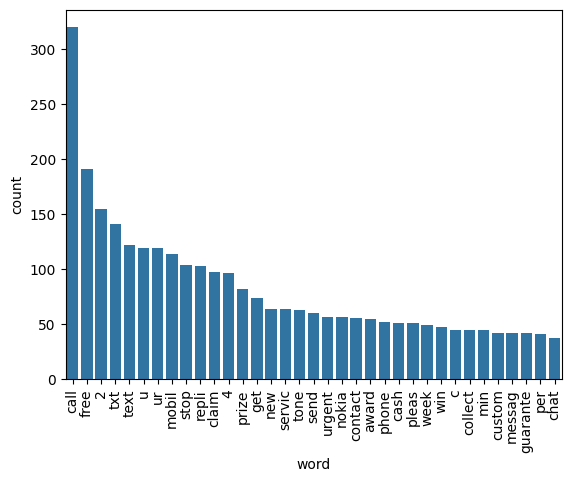

In [46]:
sns.barplot(x = 'word', y='count', data=spam_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [47]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

In [48]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(40), columns=['word', 'count'])
ham_df

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


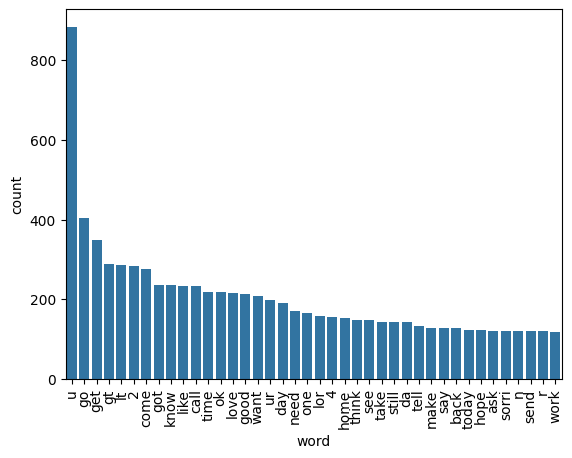

In [49]:
sns.barplot(x = 'word', y = 'count', data = ham_df)
plt.xticks(rotation = 'vertical')
plt.show()

4. MODEL BUILDING

In [50]:
df.head()

,Target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
total_words = df['transformed_text'].apply(len).sum()
total_words

np.int64(233335)

In [52]:
unique_words = set()

for txt in df['transformed_text']:
    tokens = nltk.word_tokenize(txt) 
    unique_words.update(tokens)

total_unique_words = len(unique_words)
total_unique_words

6736

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = cv.fit_transform(df['transformed_text']).toarray()
print(X.shape)

X2 = tfidf.fit_transform(df['transformed_text']).toarray()
print(X2.shape)

(5169, 6708)
(5169, 3000)


In [55]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [56]:
y2 = df['Target'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [58]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4135, 6708))

In [59]:
len(X_train)

4135

In [60]:
len(X_train[0])

6708

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=2)

In [62]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [63]:
len(X2[0])

3000

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1))

Accuracy score:  0.8800773694390716
Confusion matrix:  [[792 104]
 [ 20 118]]
Precision score:  0.5315315315315315


In [67]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred2)) 
print('Confusion matrix: ', confusion_matrix(y_test, y_pred2))
print('Precision score: ', precision_score(y_test, y_pred2))

Accuracy score:  0.9642166344294004
Confusion matrix:  [[871  25]
 [ 12 126]]
Precision score:  0.8344370860927153


In [68]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred3))
print('Precision score: ', precision_score(y_test, y_pred3))

Accuracy score:  0.9700193423597679
Confusion matrix:  [[893   3]
 [ 28 110]]
Precision score:  0.9734513274336283


FOR TFIDF

In [69]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

In [70]:
gnb2.fit(X2_train, y2_train)
pred1 = gnb2.predict(X2_test)

print('Accuracy score: ', accuracy_score(y2_test, pred1))
print('Confusion matrix: ', confusion_matrix(y2_test, pred1))
print('Precision score: ', precision_score(y2_test, pred1))

Accuracy score:  0.874274661508704
Confusion matrix:  [[790 106]
 [ 24 114]]
Precision score:  0.5181818181818182


In [71]:
mnb2.fit(X2_train, y2_train)
pred2 = mnb2.predict(X2_test)

print('Accuracy score: ', accuracy_score(y2_test, pred2))
print('Confusion matrix: ', confusion_matrix(y2_test, pred2))
print('Precision score: ', precision_score(y2_test, pred2))

Accuracy score:  0.9709864603481625
Confusion matrix:  [[896   0]
 [ 30 108]]
Precision score:  1.0


In [72]:
bnb2.fit(X2_train, y2_train)
pred3 = bnb2.predict(X2_test)

print('Accuracy score: ', accuracy_score(y2_test, pred3))
print('Confusion matrix: ', confusion_matrix(y2_test, pred3))
print('Precision score: ', precision_score(y2_test, pred3))

Accuracy score:  0.9835589941972921
Confusion matrix:  [[895   1]
 [ 16 122]]
Precision score:  0.991869918699187


BEST --> Multinomial NB with TFIDF 

In [73]:
!pip install xgboost

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb_ = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) # More random than random forest
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb_, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
train_classifier(svc,X2_train,y2_train,X2_test,y2_test)

(0.9758220502901354, 0.9747899159663865)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X2_train,y2_train,X2_test,y2_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96


c:\Users\HP\Desktop\SMS_Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\HP\Desktop\SMS_Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm") 
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


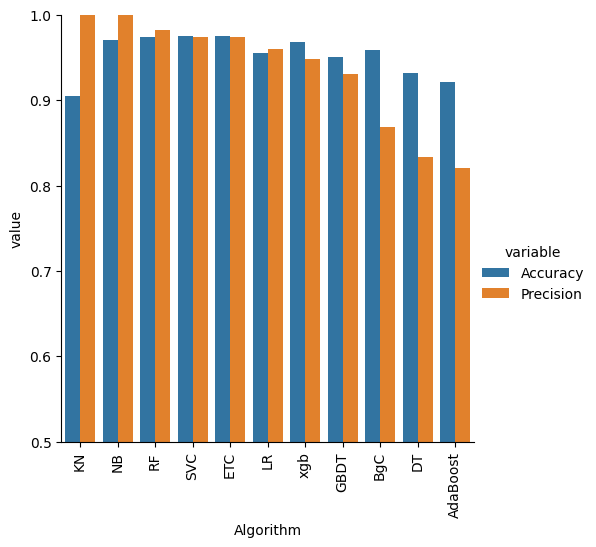

In [82]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
#trying model improvement in mnb for tfidf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
new_acc, new_prec = train_classifier(mnb_, X2_train, y2_train, X2_test, y2_test)
print(new_acc, new_prec)

0.9709864603481625 1.0


In [85]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [86]:
temp_df.loc[temp_df['Algorithm'] == 'NB', 'Accuracy_max_ft_3000'] = new_acc
temp_df.loc[temp_df['Algorithm'] == 'NB', 'Precision_max_ft_3000'] = new_prec
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [87]:
import pickle
pickle.dump(mnb_, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [88]:
import sklearn
sklearn.__version__


'1.8.0'

In [89]:
print(mnb_.predict(X2_test)[0])
print(y2_test[0])

0
0
